# Introduction - Emotion analysis & model

In this notebook, we will explore and analyze the dataset of different emotions and we will build a model to assess its performance.

# 1) Get started

Lets import some libraries, load a dataset to manipulate and explore the data for preparation to our analysis and training on model.

In [22]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter
from wordcloud import WordCloud

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
load_data = pd.read_csv('text.csv')

In [3]:
load_data.shape

(416809, 3)

In [4]:
load_data.head()

Unnamed: 0                                               text  label
0           0      i just feel really helpless and heavy hearted      4
1           1  ive enjoyed being able to slouch about relax a...      0
2           2  i gave up my internship with the dmrg and am f...      4
3           3                         i dont know i feel so lost      0
4           4  i am a kindergarten teacher and i am thoroughl...      4

In [5]:
load_data.tail()

Unnamed: 0                                               text  label
416804      416804  i feel like telling these horny devils to find...      2
416805      416805  i began to realize that when i was feeling agi...      3
416806      416806  i feel very curious be why previous early dawn...      5
416807      416807  i feel that becuase of the tyranical nature of...      3
416808      416808  i think that after i had spent some time inves...      5

In [6]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


In [7]:
load_data.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

In [8]:
load_data.duplicated().sum()

0

# 2) EDA

We need to used a different charts to analyze in each emotional texts.

## Text length 

We compare the length of each text distribution.

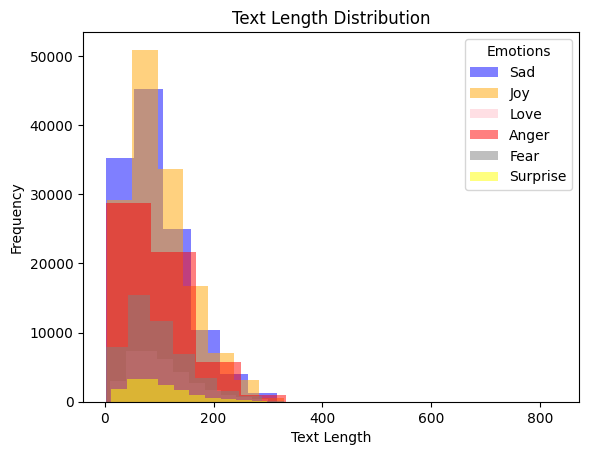

In [9]:
colors = np.array(['blue', 'orange', 'pink', 'red', 'gray', 'yellow'])
texts = {'Sad': 0, 'Joy': 1, 'Love': 2, 'Anger': 3, 'Fear': 4, 'Surprise': 5}

for (name, label), color in zip(texts.items(), colors):
    texts = load_data[load_data['label'] == label]
    frequency = [len(text) for text in texts['text']]
    
    plt.hist(frequency, alpha=0.5, label=name, linewidth=2, color=color)
    
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend(title='Emotions')
plt.show()


## Text words

We to compare the words of each text distribution.

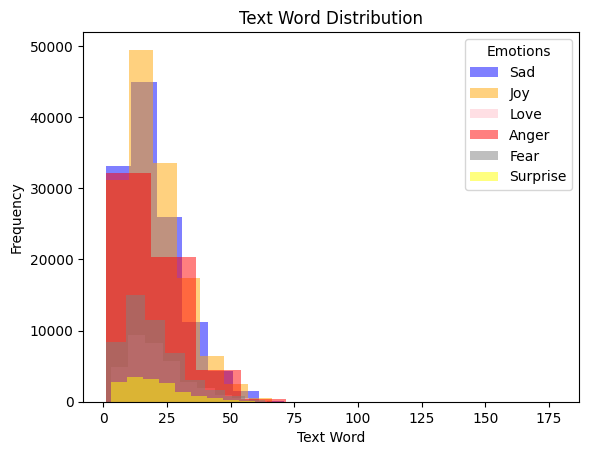

In [10]:
colors = np.array(['blue', 'orange', 'pink', 'red', 'gray', 'yellow'])
texts = {'Sad': 0, 'Joy': 1, 'Love': 2, 'Anger': 3, 'Fear': 4, 'Surprise': 5}

for (name, label), color in zip(texts.items(), colors):
    data = load_data[load_data['label'] == label]
    frequency = []
    for words in data['text']:
        word = word_tokenize(words)
        frequency.append(len(word))
    
    plt.hist(frequency, alpha=0.5, label=name, linewidth=2, color=color)
    
plt.title('Text Word Distribution')
plt.xlabel('Text Word')
plt.ylabel('Frequency')
plt.legend(title='Emotions')
plt.show()

        

## Wordcloud

We used a wordcloud to visualize the common texts on each emotions.

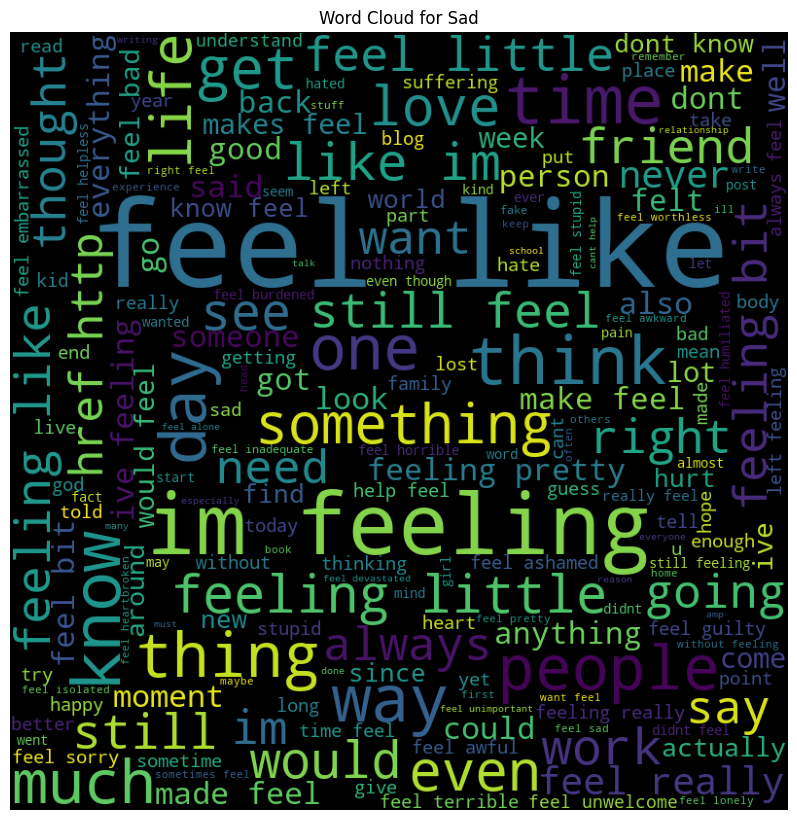

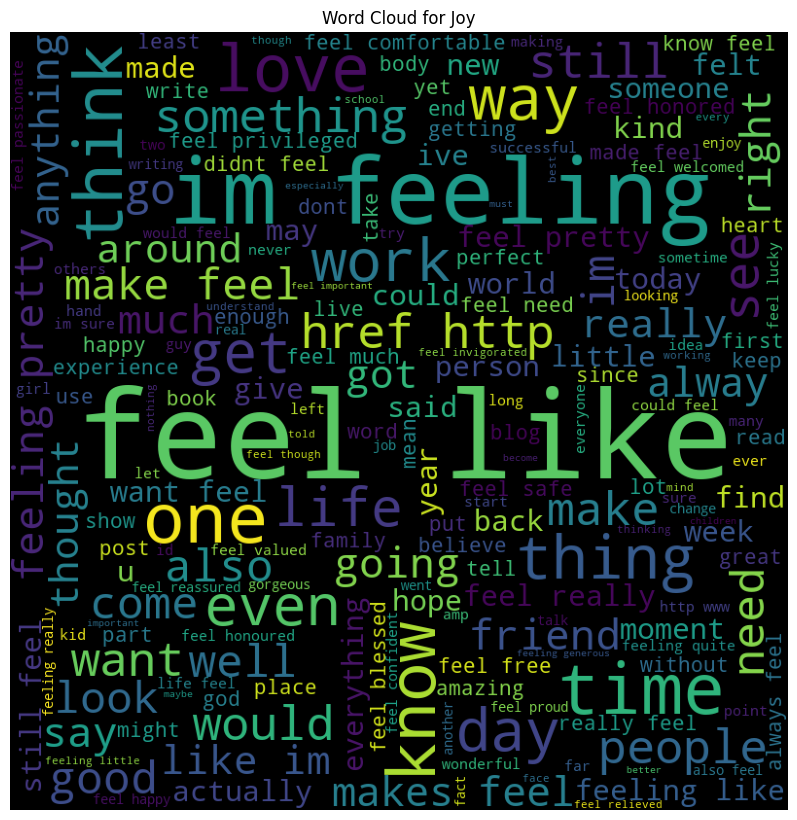

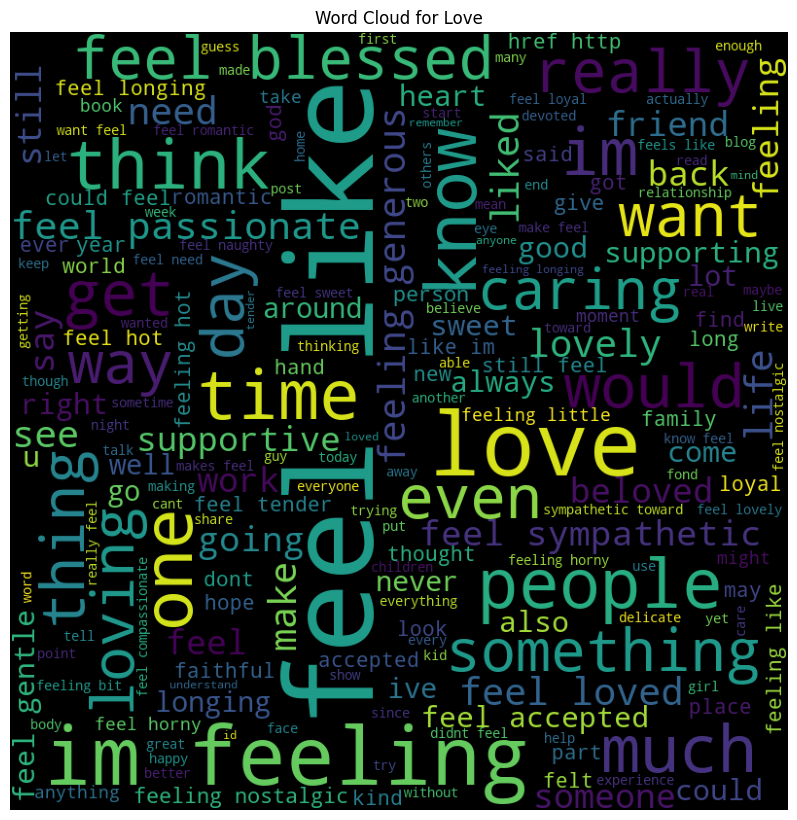

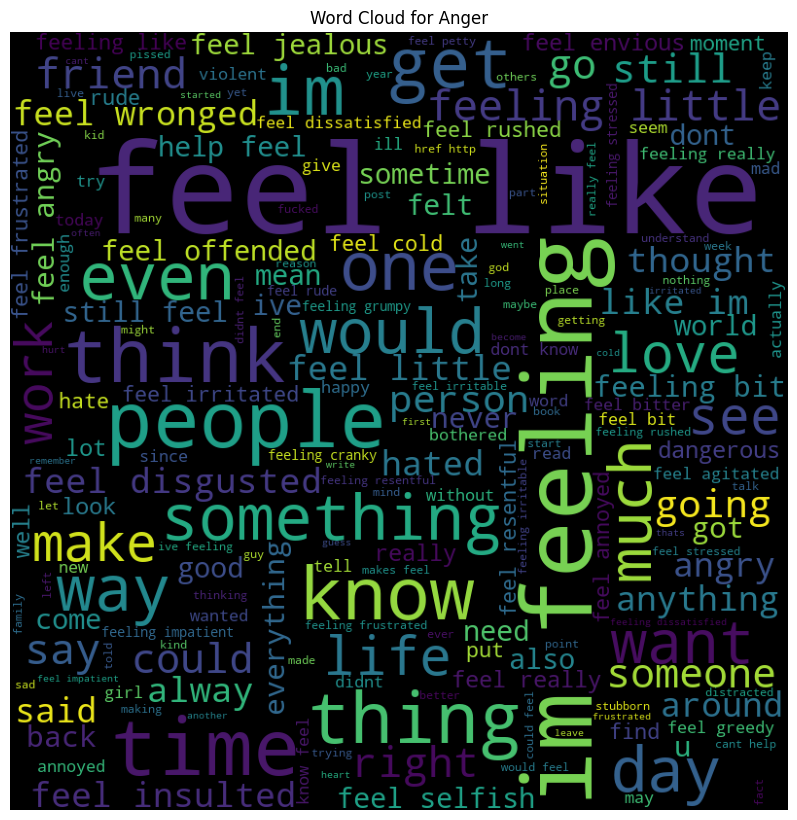

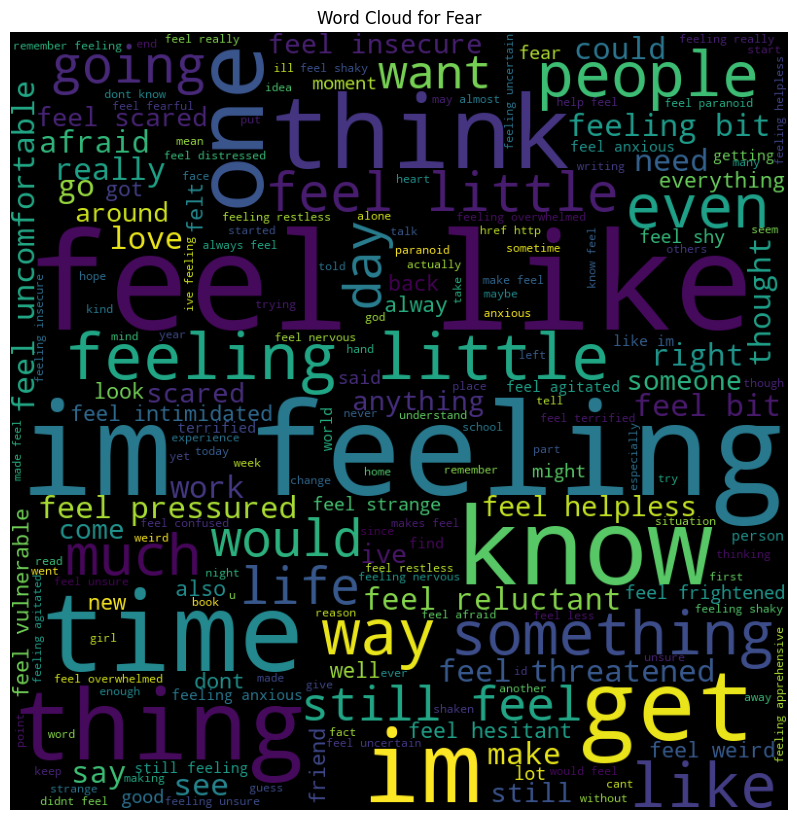

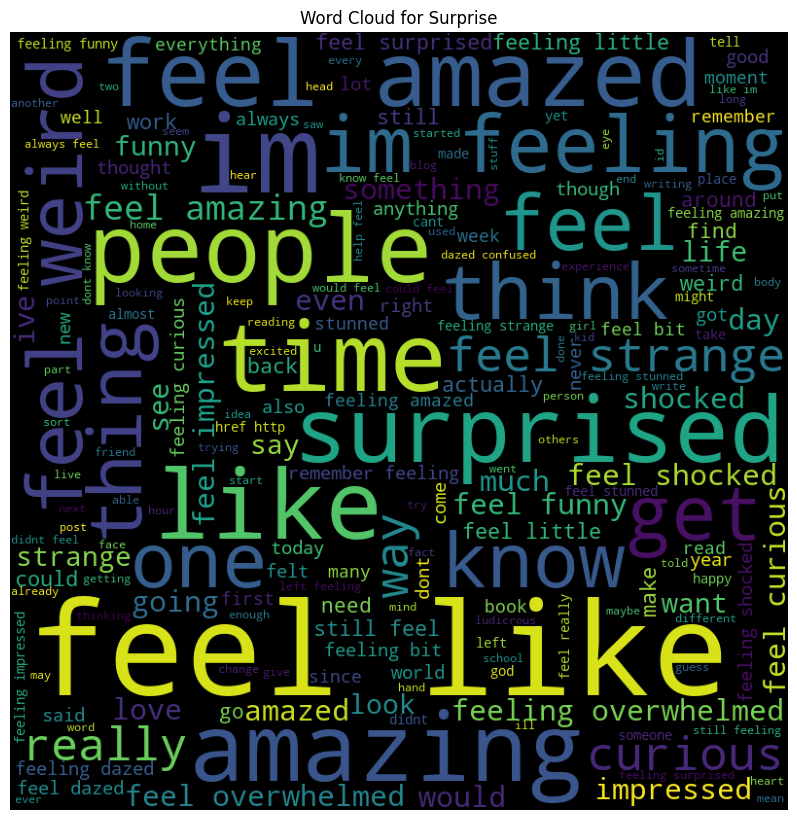

In [23]:
stop_words = set(stopwords.words('english'))

texts = {'Sad': 0, 'Joy': 1, 'Love': 2, 'Anger': 3, 'Fear': 4, 'Surprise': 5}

for name, label in texts.items():
    texts = load_data[load_data['label'] == label]
    filtered_words = []
    for text in texts['text']:
        words = word_tokenize(text)
        filtered_words.extend([word for word in words if word.lower() not in stop_words])

    filtered_text = ' '.join(filtered_words)

    wordcloud = WordCloud(
        width=800, 
        height=800, 
        background_color='black',
        stopwords=stop_words, 
        min_font_size=10).generate(filtered_text)

    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f'Word Cloud for {name}')
    plt.tight_layout(pad=0)

plt.show()

## Common words

We used a random samples on each emotional texts to visualize and compare each common words with 5000 texts samples.

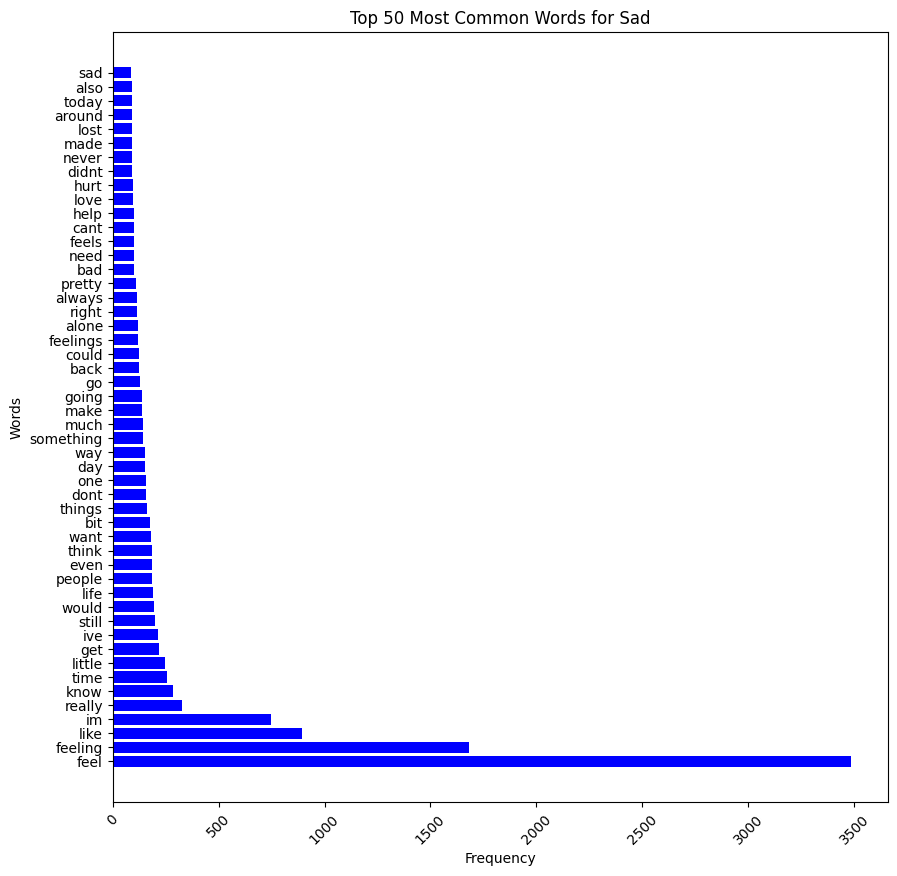

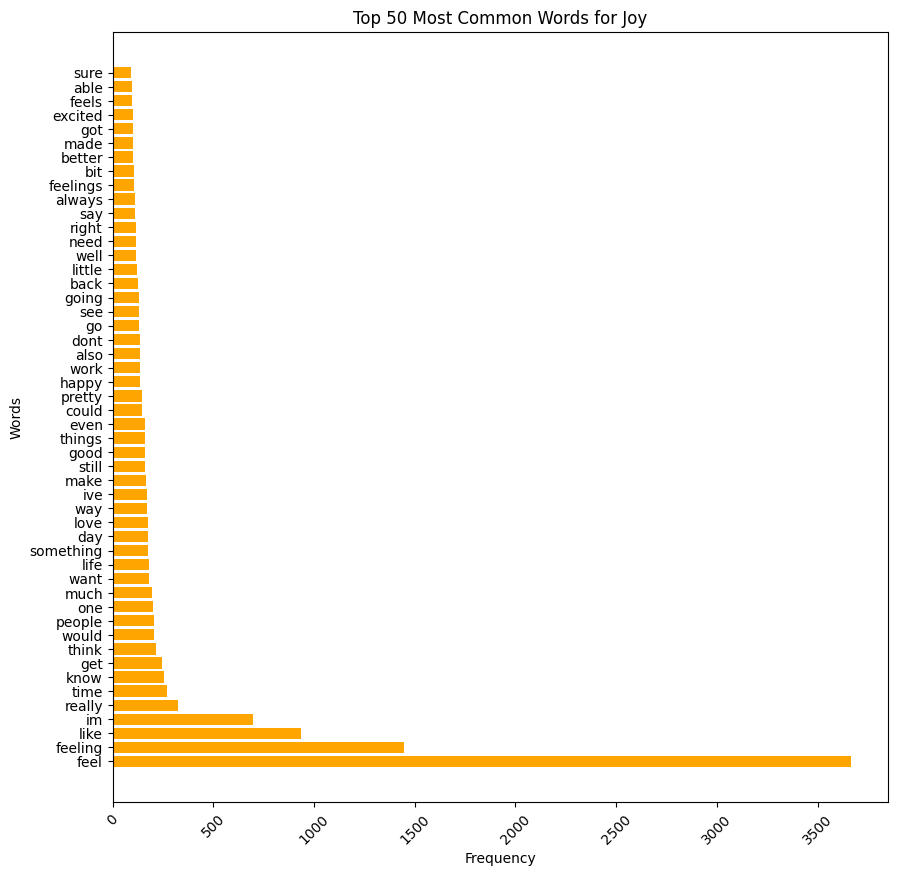

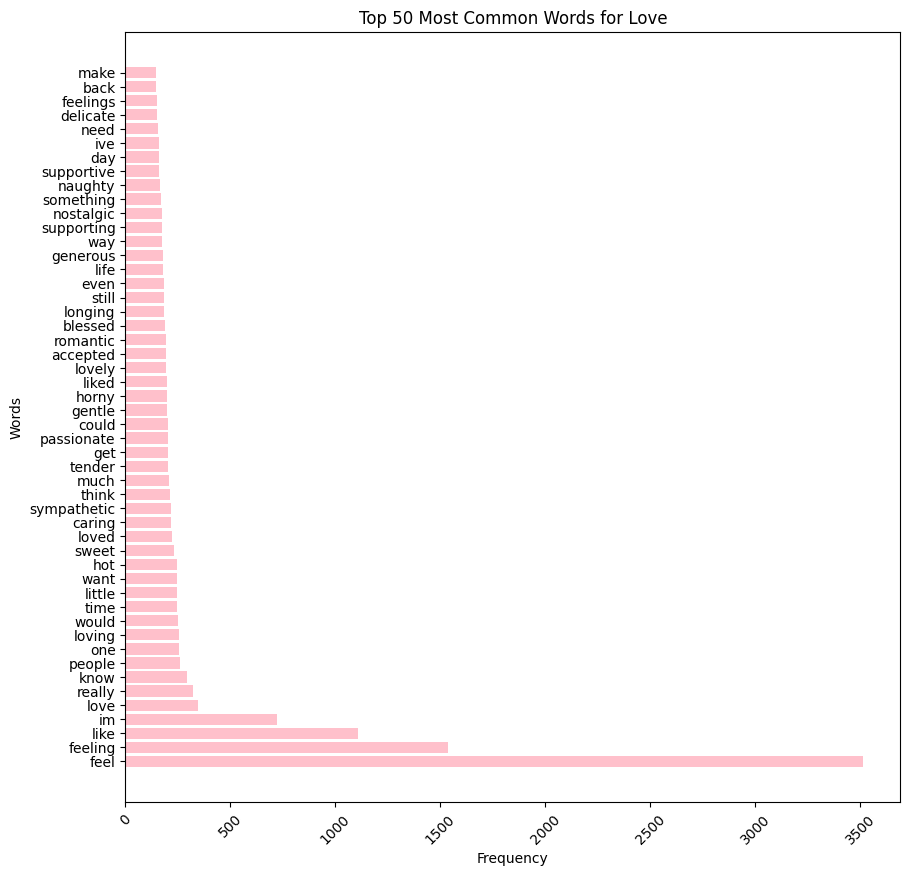

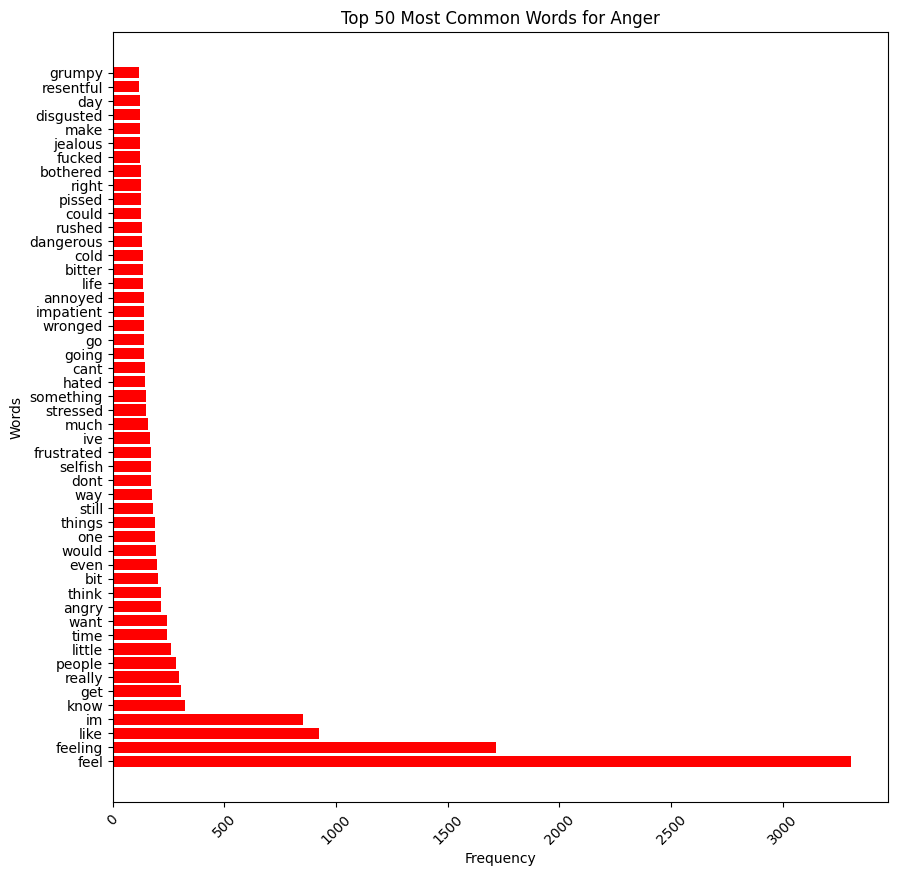

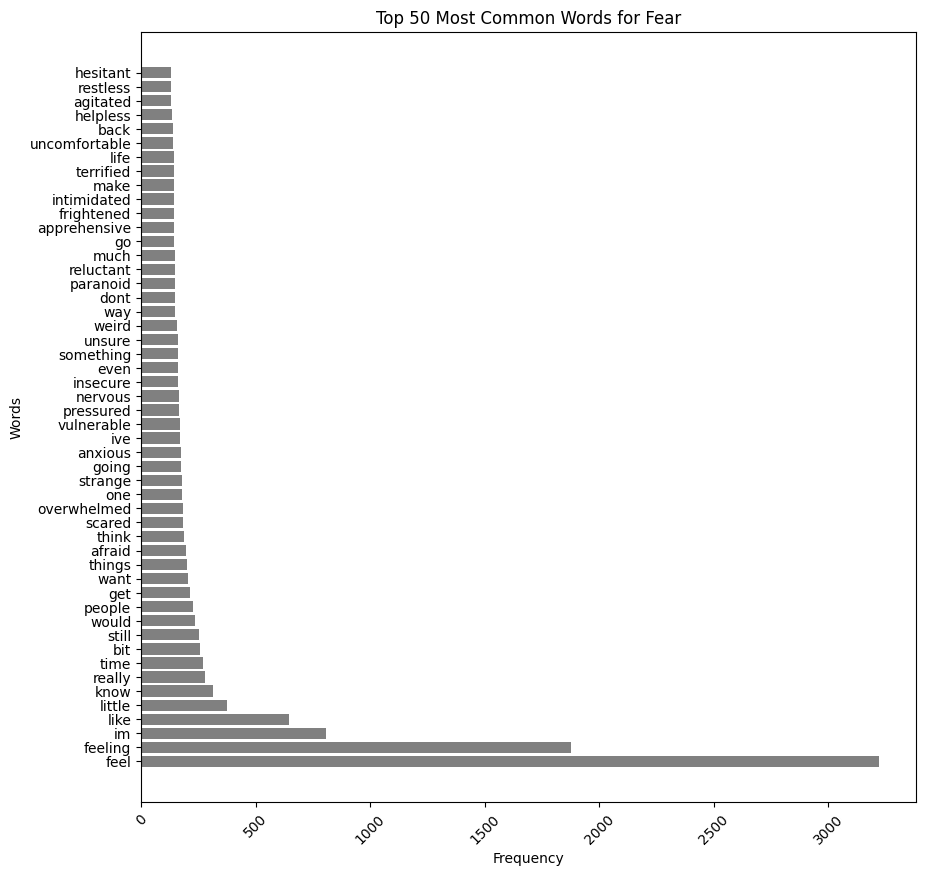

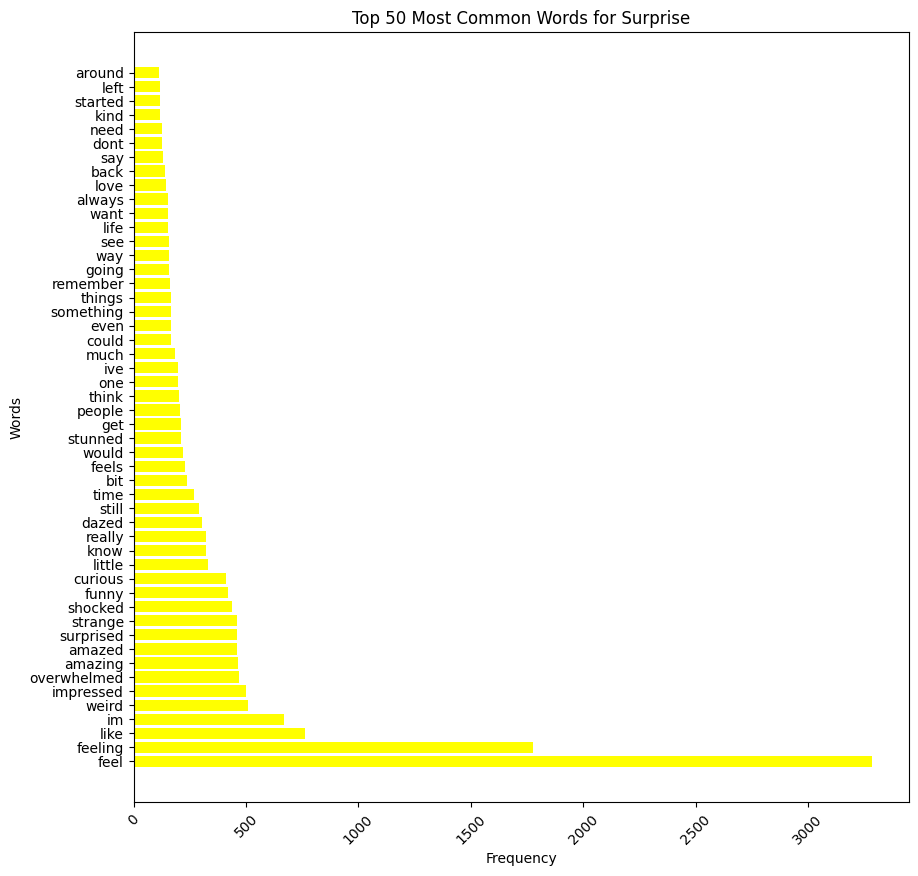

In [24]:
import random

stop_words = set(stopwords.words('english'))

colors = np.array(['blue', 'orange', 'pink', 'red', 'gray', 'yellow'])
texts = {'Sad': 0, 'Joy': 1, 'Love': 2, 'Anger': 3, 'Fear': 4, 'Surprise': 5}

for (name, label), color in zip(texts.items(), colors):
    texts = load_data[load_data['label'] == label]

    sample = []
    for text in texts['text']:
        sample.append(text)

    sampled_texts = random.sample(sample, 5000)

    result = []
    for text in sampled_texts:
        tokens = word_tokenize(text)
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalnum()]
        result.extend(filtered_tokens)

    word_freq = Counter(result)

    plt.figure(figsize=(10, 10))
    common_words = word_freq.most_common(50)
    words, counts = zip(*common_words)
    plt.barh(words, counts, color=color)
    plt.title(f'Top 50 Most Common Words for {name}')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.xticks(rotation=45)

plt.show()

## Bar chart

We used a bar chart to compare the total of each emotional texts.

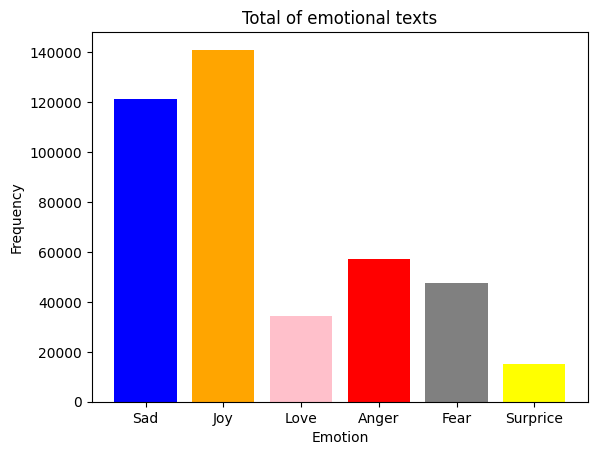

In [13]:
Sad = load_data[load_data['label'] == 0].shape[0]
Joy = load_data[load_data['label'] == 1].shape[0]
Love = load_data[load_data['label'] == 2].shape[0]
Anger = load_data[load_data['label'] == 3].shape[0]
Fear = load_data[load_data['label'] == 4].shape[0]
Surprice = load_data[load_data['label'] == 5].shape[0]

emotions = np.array(['Sad', 'Joy', 'Love', 'Anger', 'Fear', 'Surprice'])
frequency = np.array([Sad, Joy, Love, Anger, Fear, Surprice])
colors = np.array(['blue', 'orange', 'pink', 'red', 'gray', 'yellow'])

plt.bar(emotions, frequency, color=colors)
plt.title('Total of emotional texts')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.show()

# 3) Model

We used naive bayes algorithm to train with data and assess its model performance.

In [14]:
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

## Training preparation

We preprocessed our dataset to standarize and normalize the texts.

In [15]:
lemma = WordNetLemmatizer()

def processed_text(text):
  token = word_tokenize(text.lower())
  stopwords_removed = [lemma.lemmatize(word) for word in token if word not in stop_words]

  return ' '.join(stopwords_removed)

load_data['processed_text'] = load_data['text'].apply(processed_text)

processed_text = pd.DataFrame({
  'processed_text': load_data['processed_text'],
  'label': load_data['label'] 
})

processed_text


processed_text  label
0                      feel really helpless heavy hearted      4
1       ive enjoyed able slouch relax unwind frankly n...      0
2                 gave internship dmrg feeling distraught      4
3                                     dont know feel lost      0
4       kindergarten teacher thoroughly weary job take...      4
...                                                   ...    ...
416804  feel like telling horny devil find site suited...      2
416805  began realize feeling agitated restless would ...      3
416806  feel curious previous early dawn time seek tro...      5
416807  feel becuase tyranical nature government el sa...      3
416808  think spent time investigating surroundings th...      5

[416809 rows x 2 columns]

## Fine tunning

We optimize our model for better performance.

In [16]:
param_grid_cnb = {
    'alpha': [0.0, 0.1, 0.5, 1.0, 10.0],
    'norm': [True, False]
}

param_grid_bnb = {
    'alpha': [0.0, 0.1, 0.5, 1.0, 10.0],
    'binarize': [0.0, 0.5, 1.0, None],
    'fit_prior': [True, False]
}

param_grid_mnb = {
    'alpha': [0.0, 0.1, 0.5, 1.0, 10.0],
    'fit_prior': [True, False]
}

grid_search_cnb = GridSearchCV(ComplementNB(), param_grid_cnb, cv=5, scoring='accuracy')
grid_search_bnb = GridSearchCV(BernoulliNB(), param_grid_bnb, cv=5, scoring='accuracy')
grid_search_mnb = GridSearchCV(MultinomialNB(), param_grid_mnb, cv=5, scoring='accuracy')

models = [grid_search_cnb, grid_search_bnb, grid_search_mnb]
model_names = ['ComplementNB', 'BernoulliNB', 'MultinomialNB']

In [17]:
tfid = TfidfVectorizer()

feature = tfid.fit_transform(processed_text['processed_text'])
label = processed_text['label']

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=42)

## Bar chart

We used a bar chart to our model to compare the evaluation result.

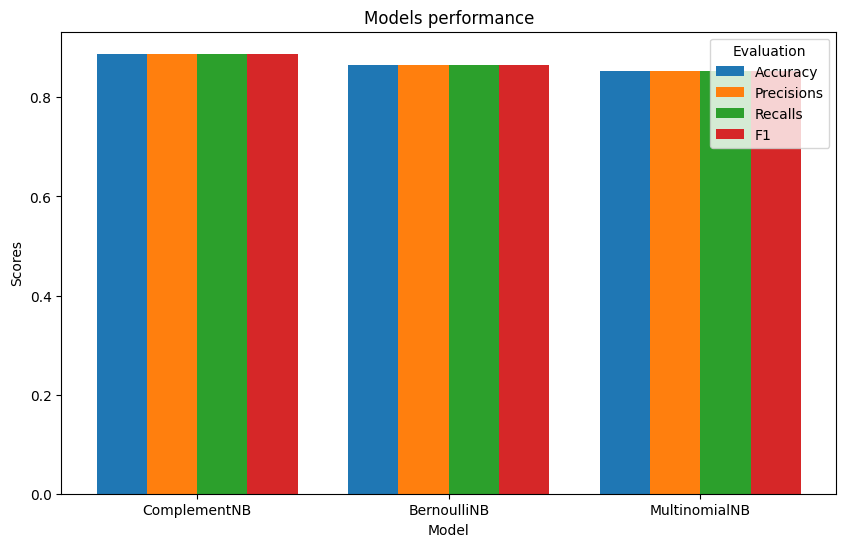

In [18]:
accuracies = []
precisions = []
recalls = []
f1 = []

for model in models:
    model.fit(X_train, y_train)

    pred = model.best_estimator_.predict(X_test)

    accuracies.append(accuracy_score(y_test, pred))
    precisions.append(precision_score(y_test, pred, average='micro'))
    recalls.append(recall_score(y_test, pred, average='micro'))
    f1.append(f1_score(y_test, pred, average='micro'))

axis = np.arange(len(model_names))

plt.figure(figsize=(10, 6))
plt.bar(axis - 0.3, accuracies, 0.2, label = 'Accuracy') 
plt.bar(axis - 0.1, precisions, 0.2, label = 'Precisions')
plt.bar(axis + 0.1, recalls, 0.2, label = 'Recalls')
plt.bar(axis + 0.3, f1, 0.2, label = 'F1')

plt.xticks(axis, model_names) 
plt.xlabel("Model") 
plt.ylabel("Scores") 
plt.title("Models performance") 
plt.legend(title="Evaluation") 
plt.show() 

## Heatmap

We used a heatmap to visualize the summary result of model matrix.

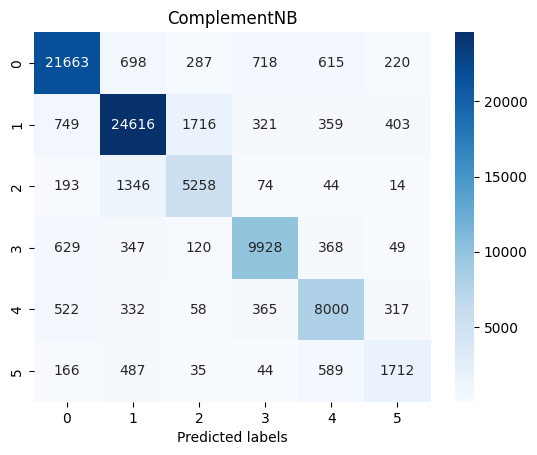

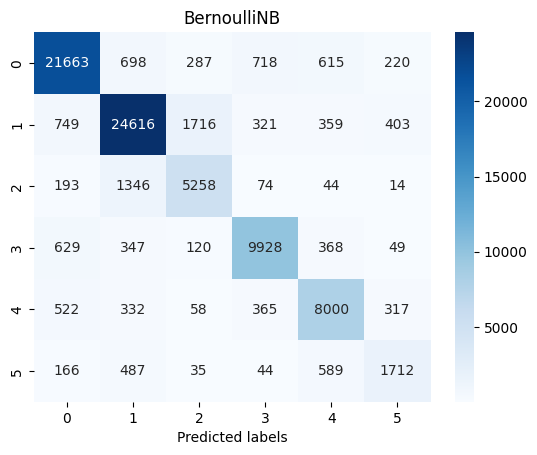

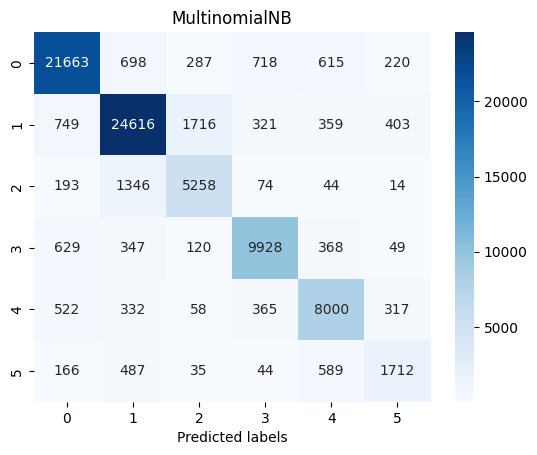

In [19]:
matrix = confusion_matrix(y_test, pred)

for model, name in zip(models, model_names):
    sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted labels')
    plt.title(name)
    plt.show()

## Pie chart

We used a pie chart to visualize the predicted labels on each model.

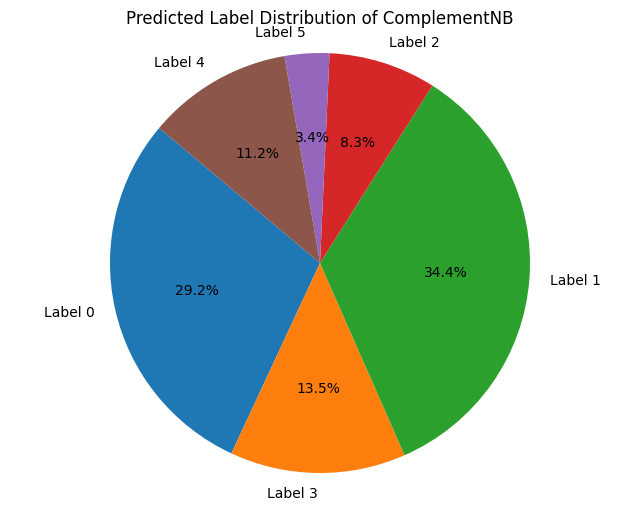

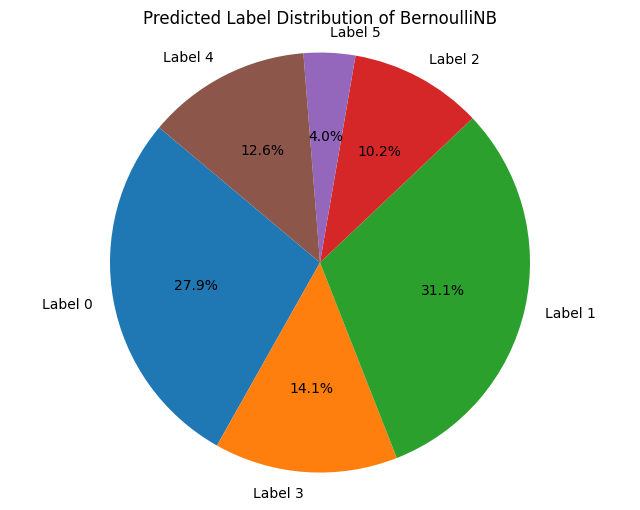

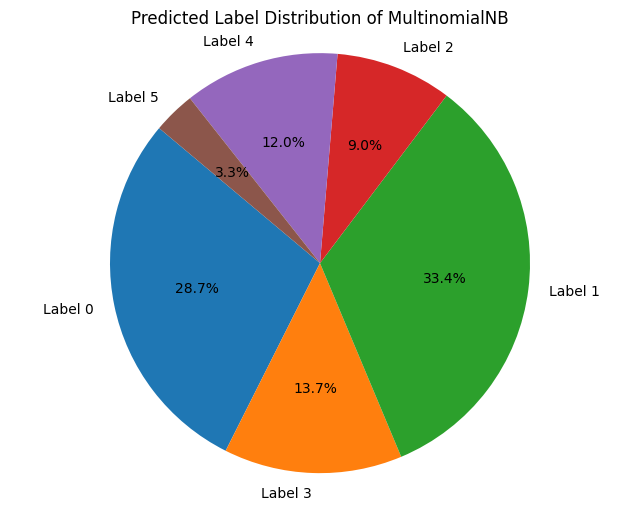

In [20]:
for model, name in zip(models, model_names):
    pred = model.best_estimator_.predict(X_test)

    label_counts = {}
    for label in pred:
        if label in label_counts:
           label_counts[label] += 1
        else:
           label_counts[label] = 1

    labels = [f'Label {label}' for label in label_counts.keys()]
    sizes = label_counts.values()

    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Predicted Label Distribution of {name}')
    plt.show()


In [21]:
for model in models:
    pred = model.best_estimator_.predict(X_test)

    print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     24201
           1       0.90      0.92      0.91     28164
           2       0.78      0.78      0.78      6929
           3       0.90      0.89      0.90     11441
           4       0.86      0.83      0.85      9594
           5       0.75      0.71      0.73      3033

    accuracy                           0.89     83362
   macro avg       0.85      0.84      0.85     83362
weighted avg       0.89      0.89      0.89     83362

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     24201
           1       0.93      0.85      0.89     28164
           2       0.68      0.84      0.75      6929
           3       0.87      0.89      0.88     11441
           4       0.79      0.87      0.83      9594
           5       0.62      0.67      0.64      3033

    accuracy                           0.86     83362
   macro avg       0.80